<a href="https://colab.research.google.com/github/Elsacred02/assignment_2_advanced_machine_learning/blob/main/Problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# Caricamento dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [22]:
X_train = x_train.reshape(-1, 3072)
X_test = x_test.reshape(-1, 3072)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255


Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

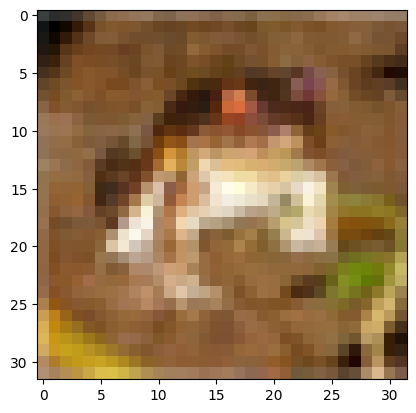

In [23]:
plt.imshow(x_train[0].reshape(32, 32, 3))
Y_train[0]

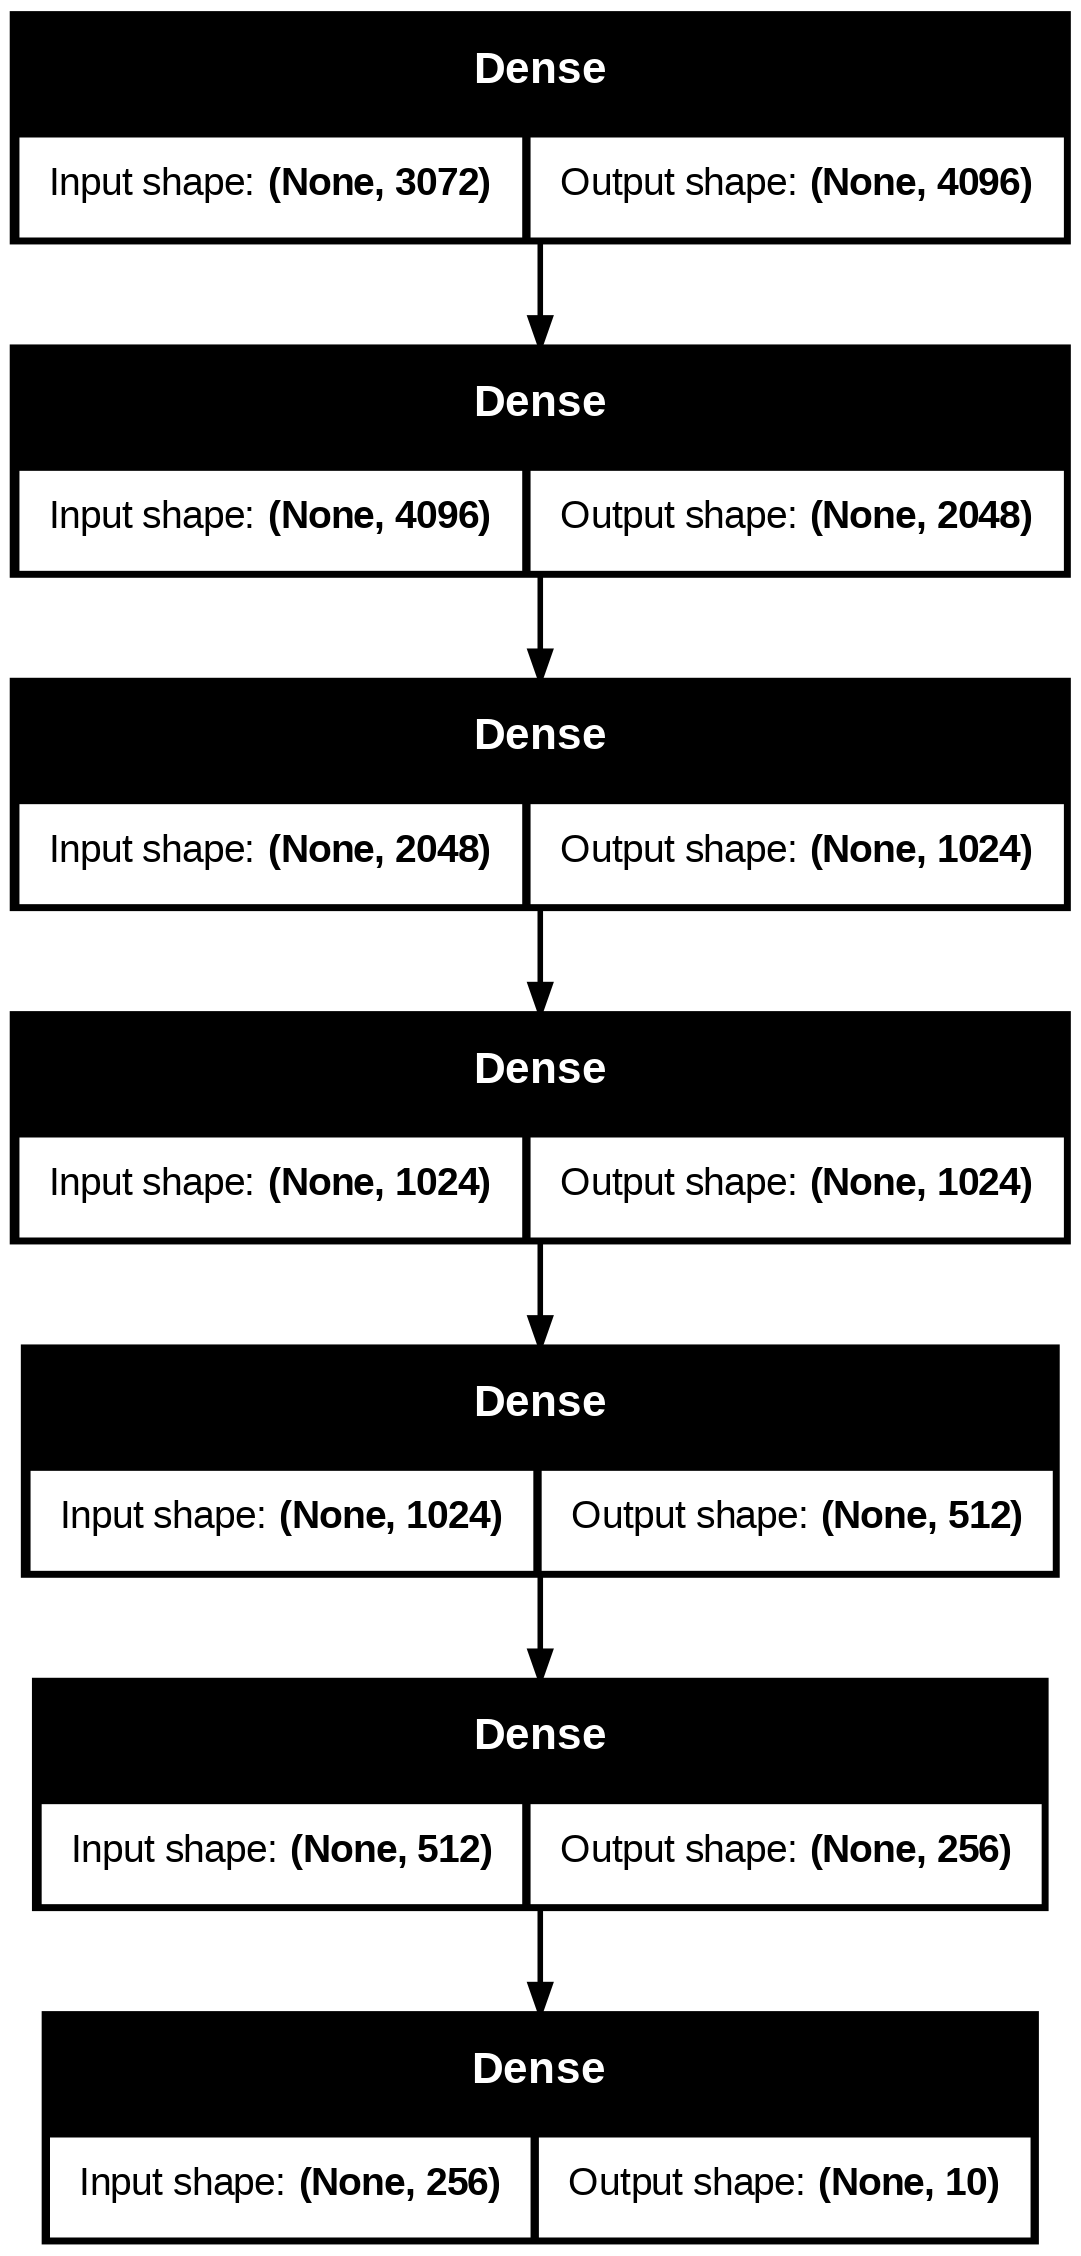

In [10]:
model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(4096, activation='relu', name='layer-one'),
    layers.Dense(2048, activation='relu', name='layer-two'),
    layers.Dense(1024, activation='relu', name='layer-three'),
    layers.Dense(1024, activation='relu', name='layer-four'),
    layers.Dense(512, activation='relu', name='layer-five'),
    layers.Dense(256, activation='relu', name='layer-six'),
    layers.Dense(10, activation='softmax', name='layer-seven')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

keras.utils.plot_model(model, show_shapes = True)

In [11]:
history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=100,
    validation_data=(X_test, Y_test),
    verbose=1
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1868 - loss: 2.2904 - val_accuracy: 0.3325 - val_loss: 1.8333
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3451 - loss: 1.8012 - val_accuracy: 0.3720 - val_loss: 1.7122
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3875 - loss: 1.6922 - val_accuracy: 0.4029 - val_loss: 1.6449
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4115 - loss: 1.6269 - val_accuracy: 0.4414 - val_loss: 1.5708
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4411 - loss: 1.5485 - val_accuracy: 0.4382 - val_loss: 1.5495
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4556 - loss: 1.5099 - val_accuracy: 0.4551 - val_loss: 1.5228
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4733 - loss: 1.4665 - val_accuracy: 0.4772 - val_loss: 1.4763
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4891 - loss: 1.4218 - val

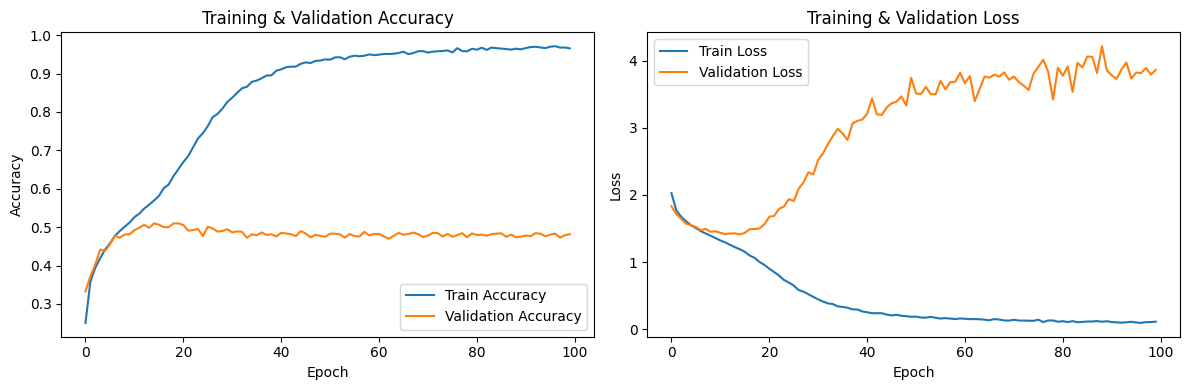

In [12]:
# Plot dei risultati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training & Validation Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training & Validation Loss')
ax2.legend()

plt.tight_layout()
plt.savefig('problem2_original_results.png')
plt.show()

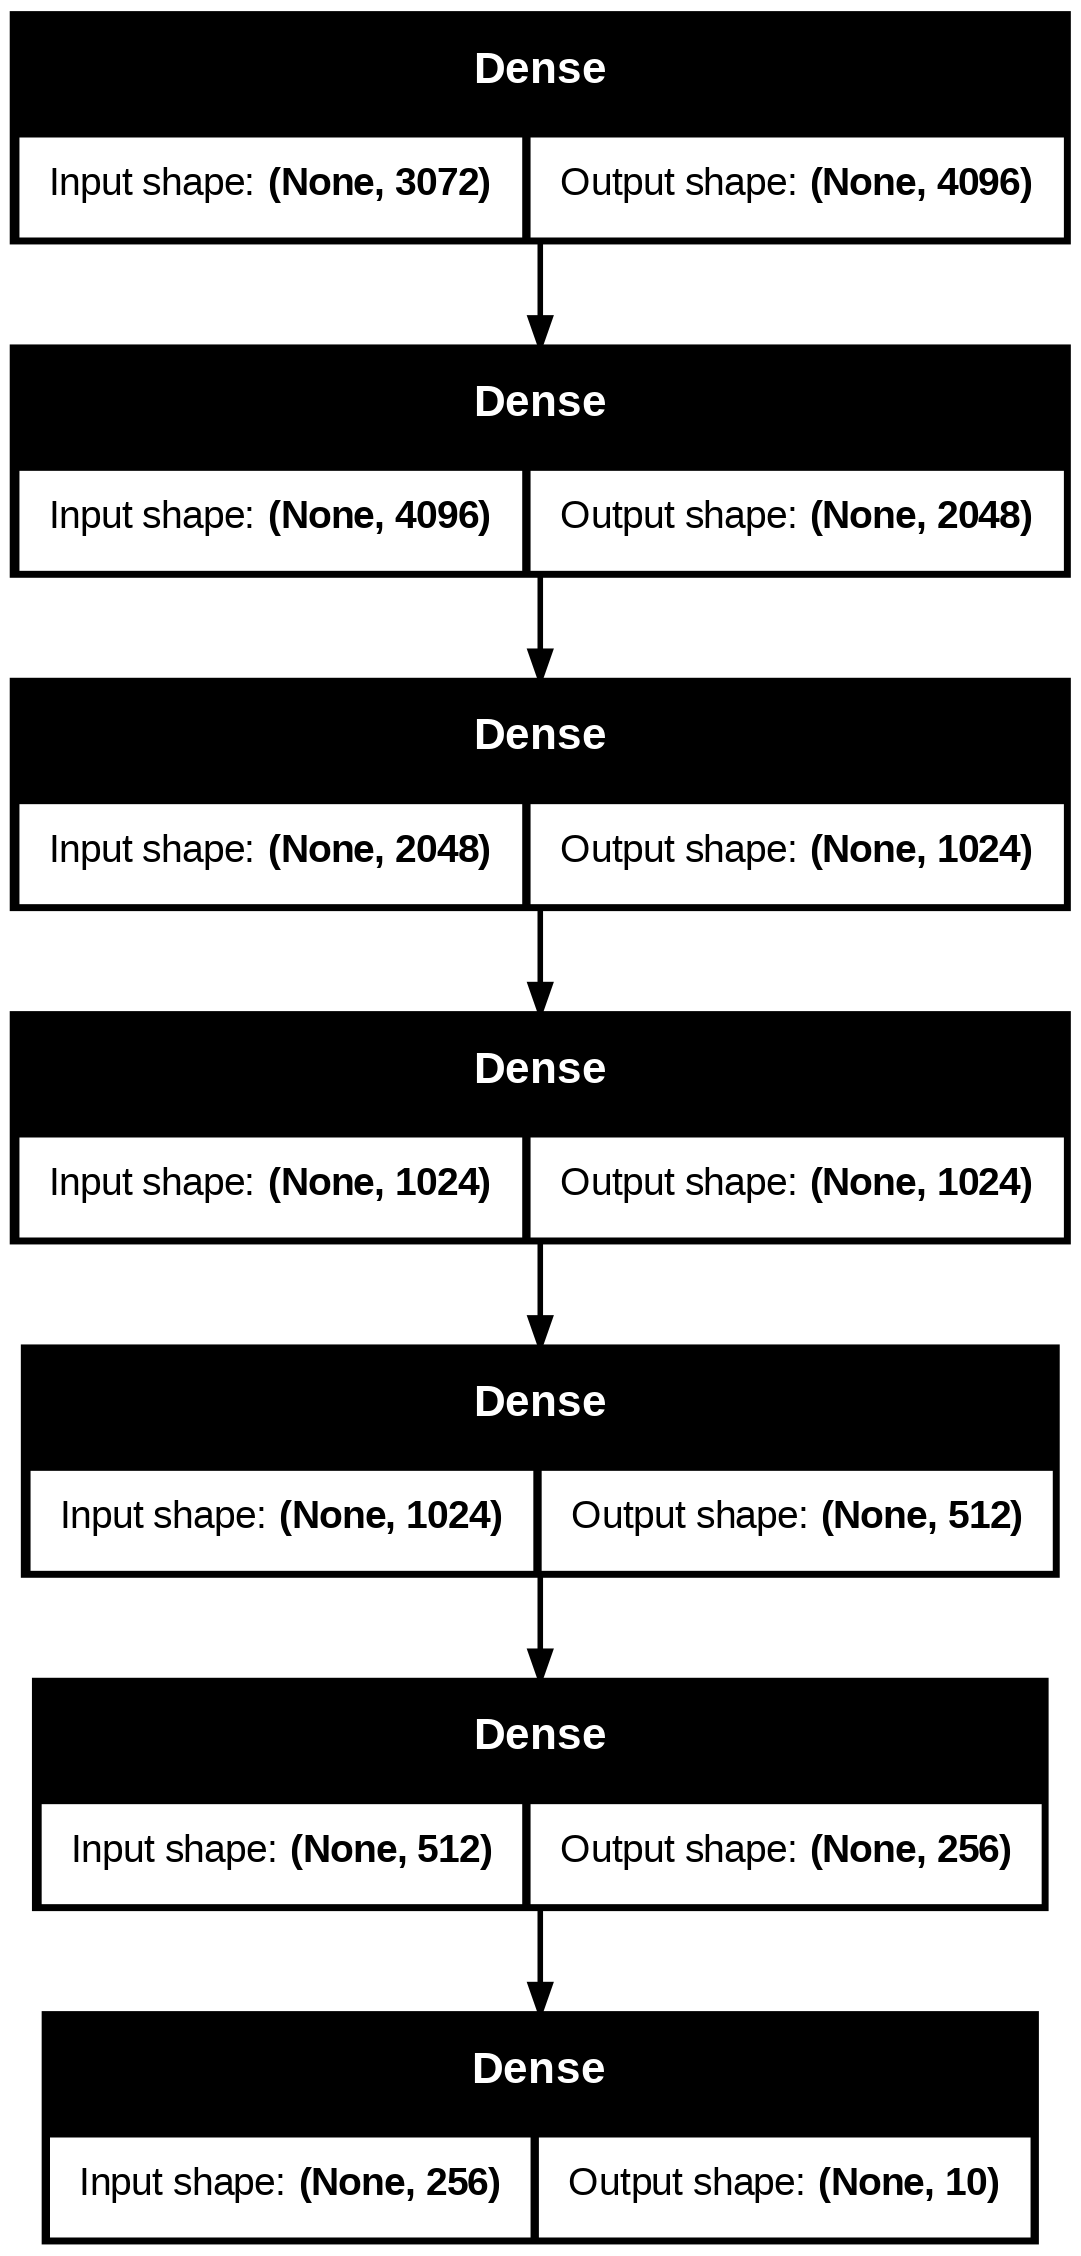

In [24]:
# Modello con L2 Regularization (e Dropout)
model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # layers.Dropout(0.4),  # Dropout dopo Dense
    layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # layers.Dropout(0.4),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

keras.utils.plot_model(model, show_shapes = True)

In [25]:
# Callback di Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Training con Early Stopping attivo
history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=100,
    validation_data=(X_test, Y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.1452 - loss: 5.5441 - val_accuracy: 0.2133 - val_loss: 2.6433
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2513 - loss: 2.4572 - val_accuracy: 0.2902 - val_loss: 2.2059
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2979 - loss: 2.1258 - val_accuracy: 0.3265 - val_loss: 1.9532
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3202 - loss: 1.9753 - val_accuracy: 0.3250 - val_loss: 1.9470
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3482 - loss: 1.8890 - val_accuracy: 0.3702 - val_loss: 1.8185
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3771 - loss: 1.8059 - val_accuracy: 0.3931 - val_loss: 1.7711
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3923 - loss: 1.7754 - val_accuracy: 0.3895 - val_loss: 1.7643
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4043 - loss: 1.7394 -

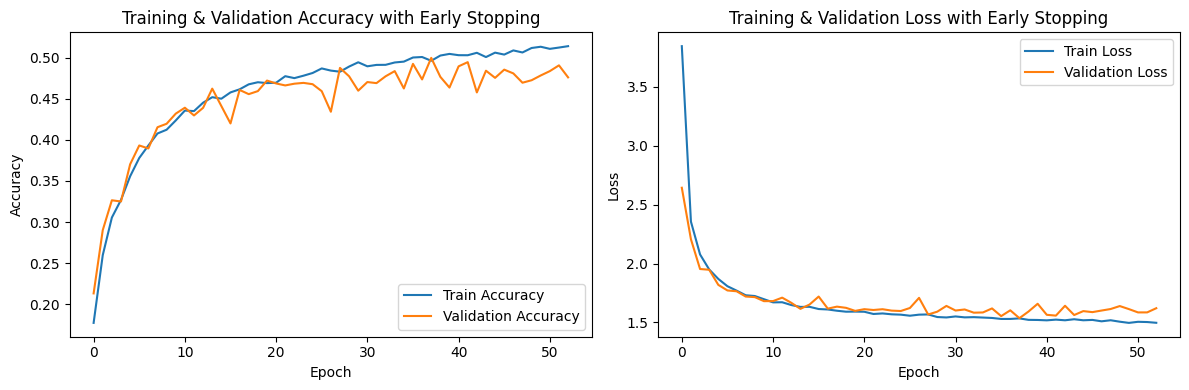

In [26]:
# Plot dei risultati con Early Stopping
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training & Validation Accuracy with Early Stopping')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training & Validation Loss with Early Stopping')
ax2.legend()

plt.tight_layout()
plt.savefig('problem2_early_stopping_results.png')
plt.show()